## Imports

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Read CSV

In [2]:
## Missing Values
missing_values = ["n/a", "na", "--", " ", "Unknown"]

In [3]:
meds = pd.read_csv("600092_data.csv",na_values = missing_values)#, na_values = missing_values

In [4]:
meds['Indication'].replace(['Asx'], ['ASx'], inplace = True)

## Summary of the numerical attributes

In [5]:
meds.describe()

,Random,Id,IPSI,Contra
count,1520.000000,1520.000000,1516.000000,1519.000000
mean,0.509545,188365.022368,78.872032,56.828176
std,0.284006,64355.870242,10.162351,29.535671
min,0.000295,78261.000000,35.000000,10.000000
25%,0.268531,137130.750000,73.000000,30.000000
50%,0.517616,191344.500000,77.000000,50.000000
75%,0.754724,244559.500000,85.000000,85.000000
max,0.999448,295978.000000,99.000000,100.000000


In [6]:
meds.head()

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20.0,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60.0,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40.0,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85.0,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20.0,NoRisk


## Dataset has 11 columns

In [7]:
print(len(meds.columns))
meds.columns

11


Index(['Random', 'Id', 'Indication', 'Diabetes', 'IHD', 'Hypertension',
       'Arrhythmia', 'History', 'IPSI', 'Contra', 'label'],
      dtype='object')

In [8]:
meds.dtypes

Random          float64
Id                int64
Indication       object
Diabetes         object
IHD              object
Hypertension     object
Arrhythmia       object
History          object
IPSI            float64
Contra          float64
label            object
dtype: object

#### Random, ID classes have  no value for predicting the data so we can drop them

In [9]:
med = meds.drop("Random", axis=1)

In [10]:
med = med.drop("Id", axis=1)

#### Check Unique Values

In [11]:
print(med['Hypertension'].unique())
print(med['Diabetes'].unique())
print(med['IHD'].unique())
print(med['Arrhythmia'].unique())
print(med['History'].unique())
print(med['Indication'].unique())
print(med['label'].unique())

['yes' 'no' nan]
['no' 'yes' nan]
['no' 'yes']
['no' 'yes']
['no' 'yes' nan]
['A-F' 'TIA' 'CVA' 'ASx' nan]
['NoRisk' 'Risk' nan]


#### Null values

In [12]:
med.isnull().sum()

Indication      3
Diabetes        2
IHD             0
Hypertension    3
Arrhythmia      0
History         2
IPSI            4
Contra          1
label           5
dtype: int64

#### We can replace the median value for the numarical  null values, however the desicion to drop them was made

In [13]:
# median = med["IPSI"].median()
# med["IPSI"] = med["IPSI"].fillna(median)

# median = med["Contra"].median()
# med["Contra"] = med["Contra"].fillna(median)
# med.isnull().sum()

#### Removing all null values after variable 'na_values' is updated

In [14]:
med = med.dropna()
med.isnull().sum()

Indication      0
Diabetes        0
IHD             0
Hypertension    0
Arrhythmia      0
History         0
IPSI            0
Contra          0
label           0
dtype: int64

In [15]:
print(med['Hypertension'].unique())
print(med['Diabetes'].unique())
print(med['IHD'].unique())
print(med['Arrhythmia'].unique())
print(med['History'].unique())
print(med['Indication'].unique())
print(med['label'].unique())

['yes' 'no']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['no' 'yes']
['A-F' 'TIA' 'CVA' 'ASx']
['NoRisk' 'Risk']


#### Two numerical attributes

In [16]:

med.describe()

,IPSI,Contra
count,1500.000000,1500.000000
mean,78.828000,56.668000
std,10.159555,29.524977
min,35.000000,10.000000
25%,73.000000,30.000000
50%,77.000000,50.000000
75%,85.000000,85.000000
max,99.000000,100.000000


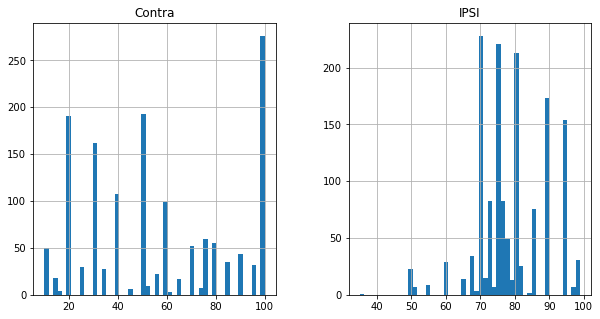

In [17]:
med.hist(bins=50, figsize=(10, 5))
plt.show()

###### We Can clearly see these numerical values pre stratified

### Check the categorical values
#### 7 Categorical Valiues
1. Indication
2. Diabetes
3. IHD
4. Hypertension 
5. Arrhythmia
6. History 
7. Contra


In [18]:
med['Indication'].value_counts()

A-F    489
CVA    407
TIA    388
ASx    216
Name: Indication, dtype: int64

In [19]:
med['Diabetes'].value_counts()

no     1425
yes      75
Name: Diabetes, dtype: int64

In [20]:
med['IHD'].value_counts()

no     789
yes    711
Name: IHD, dtype: int64

In [21]:
med['Hypertension'].value_counts()

no     777
yes    723
Name: Hypertension, dtype: int64

In [22]:
med['Arrhythmia'].value_counts()

no     1177
yes     323
Name: Arrhythmia, dtype: int64

In [23]:
med['History'].value_counts()
# med.shape

no     1478
yes      22
Name: History, dtype: int64

In [24]:
med['label'].value_counts()
# med.shape

NoRisk    1000
Risk       500
Name: label, dtype: int64

#### This Dataset has highly skewed data so it may bias to predicting the results. but at the first phase we will still  use all the categorical values for the predictions

### Identifying Outliers
When considering the outliers we can only the numericla attributes can have outliers

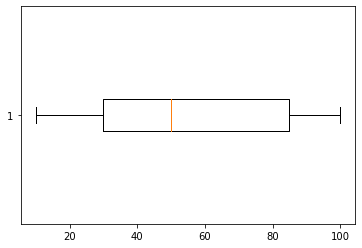

In [25]:
plt.boxplot(med["Contra"], vert = False)
plt.show()

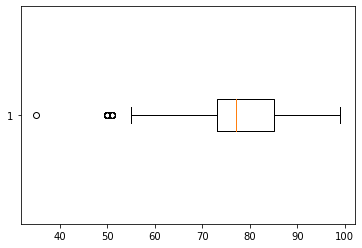

In [26]:
plt.boxplot(med["IPSI"], vert = False)
plt.show()

#### Only IPSI  has outliers

###  Removing Outliers

In [27]:
p1, p2 = np.percentile(med['IPSI'], [5, 90])
print(p1, p2)

65.0 95.0


#### The 5%th  percentile is 65 so we will use this and dropa any values below the 5th percentile.

In [28]:
med['IPSI'].describe()

count    1500.000000
mean       78.828000
std        10.159555
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [29]:
med = med[(med.IPSI>=65 )]

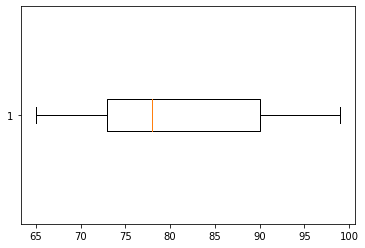

In [30]:
plt.boxplot(med["IPSI"], vert = False)
plt.show()

#### Categorical Datarame

In [31]:
med_cat = med.drop("IPSI", axis=1)
med_cat = med_cat.drop("Contra", axis=1)
med_cat = med_cat.drop("label", axis=1)
med_cat.head()

,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History
0,A-F,no,no,yes,no,no
1,TIA,no,no,no,no,no
2,A-F,no,yes,yes,no,no
3,TIA,no,no,yes,no,no
4,CVA,no,no,no,no,no


In [32]:
med_cat.shape

(1431, 6)

#### Med Labels

In [33]:
labels = med["label"].copy()
labels.head()

0    NoRisk
1    NoRisk
2      Risk
3      Risk
4    NoRisk
Name: label, dtype: object

In [34]:
labels.shape

(1431,)

#### Numerical Data Frame

In [35]:
med_num = med.filter(['IPSI','Contra'], axis=1)
med_num.head()

,IPSI,Contra
0,78.0,20.0
1,70.0,60.0
2,95.0,40.0
3,90.0,85.0
4,70.0,20.0


In [36]:
med_num.shape

(1431, 2)

In [37]:
print(med_num.shape)
med_cat.shape

(1431, 2)


(1431, 6)

In [38]:
data = pd.concat([med_cat, med_num, labels], axis=1)

## Split Train and Test set

#### The dataset has 1431 valid records so lets take 0.2 as the test set

#### so train set will have 1145 records, test set has 286 records

In [39]:
# randomize the set before split

rand = np.random.permutation(1431)
med_cat = med_cat.iloc[rand]
med_num = med_num.iloc[rand]
labels = labels.iloc[rand]

In [40]:
print(med_cat.shape)
print(med_num.shape)
print(labels.shape)

(1431, 6)
(1431, 2)
(1431,)


In [41]:
#numerical set
med_num, med_num_test = med_num[:1145], med_num[1145:]
#catagorical set
med_cat, med_cat_test = med_cat[:1145], med_cat[1145:]
#labels
labels, labels_test = labels[:1145], labels[1145:]

## Looking For Correlations
This dataset is not too large so it is relatively easy to calculate the standard relation coefficient also known as Pearson's r coefficient

In [42]:
corr_matrix = med_num.corr()
corr_matrix

,IPSI,Contra
IPSI,1.00000,0.36916
Contra,0.36916,1.00000


[]

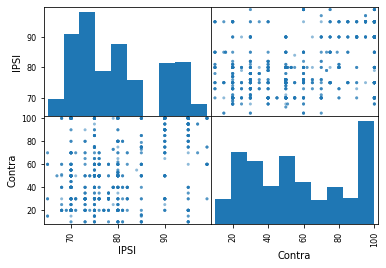

In [43]:
from pandas.plotting import scatter_matrix
scatter_matrix(med_num)
plt.plot()

##### No Correlations can be found in numerical values so we can use both numerical values, if there was a correlation, we would really only need to use one

## 1Hot encoder - Categorical feature encode

In [44]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()

In [45]:
Indication_df = pd.DataFrame(encoder.fit_transform(med_cat["Indication"]), columns=encoder.classes_)
Diabetes_df = pd.DataFrame(encoder.fit_transform(med_cat["Diabetes"]), columns=["Diabetes"])
IHD_df = pd.DataFrame(encoder.fit_transform(med_cat["IHD"]), columns=["IHD"])
Hypertension_df = pd.DataFrame(encoder.fit_transform(med_cat["Hypertension"]), columns=["Hypertension"])
Arrhythmia_df = pd.DataFrame(encoder.fit_transform(med_cat["Arrhythmia"]), columns=["Arrhythmia"])
History_df = pd.DataFrame(encoder.fit_transform(med_cat["History"]), columns=["History"])

## Training and Validation

In [46]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

def scores(clf, X, Y):
    clf.fit(X, Y)
    acc = np.average(cross_val_score(clf, X, Y, scoring='accuracy', cv=5))
    print("Accuracy  :  {:.2f} %".format(acc*100))
    pred = cross_val_predict(clf, X, Y, cv=3)
    pr = precision_score(Y, pred, average='macro')
    re = recall_score(Y,pred , average='macro')
    f1_s = f1_score(Y, pred, average='macro')
    print("Precision :  {:.2f} ".format(pr))
    print("Recall    :  {:.2f} ".format(re))
    print("F1_Score  :  {:.2f} ".format(f1_s))
    conf_mx = confusion_matrix(Y, pred)
    print("Feature Classes: {}".format(list(X.columns)))
    print("Label Classes  : {}".format(clf.classes_))
    print("Confusion Matrix  :  \n{} ".format(conf_mx))
    plt.figure(figsize=(1, 1))
    plt.matshow(conf_mx, fignum=1, cmap=plt.cm.gray)
    plt.show()
    return acc*100, pr, re, f1_s

In [47]:
res = med_num.copy()
def run_classifiers(X, Y):
    acc_list =[]
    pr_list = []
    re_list = []
    f1_s_list = []
    
    #SGD Classifier
    print("................................SGD Classifier.................................")
    sgd_clf = SGDClassifier(random_state=42)
    acc, pr, re, f1_s  = scores(sgd_clf, X, Y)
    acc_list.append(acc)
    pr_list.append(pr)
    re_list.append(re)
    f1_s_list.append(f1_s)
    print("\n")

    #Random Forest Classifier
    print("...........................Random Forest Classifier............................")
    dcn_clf = RandomForestClassifier(n_estimators=2)
    acc, pr, re, f1_s  = scores(dcn_clf, X, Y)
    acc_list.append(acc)
    pr_list.append(pr)
    re_list.append(re)
    f1_s_list.append(f1_s)
    print("\n")

    # Support Vector Classifier
    # Kernel RBF
    print(".................Support Vector Classifier - Kernel RBF......................")
    svc_clf = SVC(gamma='auto', kernel='rbf')
    acc, pr, re, f1_s  = scores(svc_clf, X, Y)
    acc_list.append(acc)
    pr_list.append(pr)
    re_list.append(re)
    f1_s_list.append(f1_s)
    print("\n")

    # Support Vector Classifier
    # Kernel Linear
    print("...............Support Vector Classifier - Kernel Linear.....................")
    svc_clf = SVC(gamma='auto', kernel='linear')
    acc, pr, re, f1_s  = scores(svc_clf, X, Y)
    acc_list.append(acc)
    pr_list.append(pr)
    re_list.append(re)
    f1_s_list.append(f1_s)
    print("\n")

    # Gausian Naive Baised
    print(".....................Gausian Naive Biased....................................")
    nb_reg = GaussianNB()
    acc, pr, re, f1_s  = scores(nb_reg, X, Y)
    acc_list.append(acc)
    pr_list.append(pr)
    re_list.append(re)
    f1_s_list.append(f1_s)
    print("\n")
    
    return acc_list, pr_list, re_list, f1_s_list

## Checking the Validations with only Numerical Attributes


................................SGD Classifier.................................
Accuracy  :  73.07 %
Precision :  0.71 
Recall    :  0.72 
F1_Score  :  0.66 
Feature Classes: ['IPSI', 'Contra']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[403 356]
 [ 32 354]] 


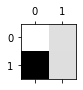



...........................Random Forest Classifier............................
Accuracy  :  90.66 %
Precision :  0.89 
Recall    :  0.90 
F1_Score  :  0.90 
Feature Classes: ['IPSI', 'Contra']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[701  58]
 [ 48 338]] 


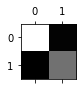



.................Support Vector Classifier - Kernel RBF......................
Accuracy  :  89.26 %
Precision :  0.89 
Recall    :  0.89 
F1_Score  :  0.89 
Feature Classes: ['IPSI', 'Contra']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[706  53]
 [ 55 331]] 


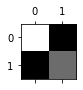



...............Support Vector Classifier - Kernel Linear.....................
Accuracy  :  86.29 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[691  68]
 [ 91 295]] 


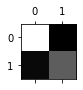



.....................Gausian Naive Biased....................................
Accuracy  :  85.85 %
Precision :  0.84 
Recall    :  0.84 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[679  80]
 [ 83 303]] 


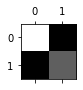

In [48]:
acc_list, pr_list, re_list, f1_s_list = run_classifiers(res, labels)

## Checking the Validations with Numerical Features and Diabetes Categorical Features

................................SGD Classifier.................................
Accuracy  :  74.62 %
Precision :  0.74 
Recall    :  0.69 
F1_Score  :  0.70 
Feature Classes: ['IPSI', 'Contra', 'Diabetes']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[508  58]
 [149 136]] 


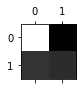



...........................Random Forest Classifier............................
Accuracy  :  88.37 %
Precision :  0.87 
Recall    :  0.87 
F1_Score  :  0.87 
Feature Classes: ['IPSI', 'Contra', 'Diabetes']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[516  50]
 [ 51 234]] 


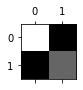



.................Support Vector Classifier - Kernel RBF......................
Accuracy  :  89.31 %
Precision :  0.89 
Recall    :  0.87 
F1_Score  :  0.88 
Feature Classes: ['IPSI', 'Contra', 'Diabetes']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[531  35]
 [ 55 230]] 


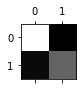



...............Support Vector Classifier - Kernel Linear.....................
Accuracy  :  86.49 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra', 'Diabetes']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[512  54]
 [ 63 222]] 


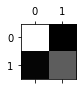



.....................Gausian Naive Biased....................................
Accuracy  :  86.25 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.85 
Feature Classes: ['IPSI', 'Contra', 'Diabetes']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[510  56]
 [ 61 224]] 


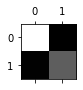

In [49]:
# Check those with diabetes
ress = pd.concat([res, Diabetes_df, labels], axis=1)
ress = ress.dropna()
labelss = ress["label"]
ress = ress.drop(["label"], axis=1)
acc_list_diabetes, pr_list_diabetes, re_list_diabetes, f1_s_list_diabetes = run_classifiers(ress, labelss)

## Checking the Validations with Numerical Features and  Indication Features

................................SGD Classifier.................................
Accuracy  :  68.75 %
Precision :  0.72 
Recall    :  0.70 
F1_Score  :  0.70 
Feature Classes: ['IPSI', 'Contra', 'A-F', 'ASx', 'CVA', 'TIA']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[481  85]
 [131 154]] 


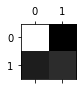



...........................Random Forest Classifier............................
Accuracy  :  85.43 %
Precision :  0.86 
Recall    :  0.83 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra', 'A-F', 'ASx', 'CVA', 'TIA']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[527  39]
 [ 76 209]] 


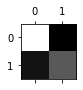



.................Support Vector Classifier - Kernel RBF......................
Accuracy  :  89.43 %
Precision :  0.88 
Recall    :  0.85 
F1_Score  :  0.86 
Feature Classes: ['IPSI', 'Contra', 'A-F', 'ASx', 'CVA', 'TIA']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[531  35]
 [ 66 219]] 


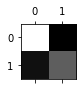



...............Support Vector Classifier - Kernel Linear.....................
Accuracy  :  85.90 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra', 'A-F', 'ASx', 'CVA', 'TIA']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[515  51]
 [ 66 219]] 


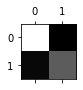



.....................Gausian Naive Biased....................................
Accuracy  :  86.14 %
Precision :  0.85 
Recall    :  0.85 
F1_Score  :  0.85 
Feature Classes: ['IPSI', 'Contra', 'A-F', 'ASx', 'CVA', 'TIA']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[510  56]
 [ 60 225]] 


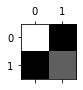

In [50]:
Checking# Check those with Indication
ress = pd.concat([res, Indication_df, labels], axis=1)
ress = ress.dropna()
labelss = ress["label"]
ress = ress.drop(["label"], axis=1)
acc_list_Indication, pr_list_Indication, re_list_Indication, f1_s_list_Indication = run_classifiers(ress, labelss)

## Checking the Validations with Numerical Features and IHD Categorical Features

................................SGD Classifier.................................
Accuracy  :  76.75 %
Precision :  0.74 
Recall    :  0.67 
F1_Score  :  0.68 
Feature Classes: ['IPSI', 'Contra', 'IHD']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[521  45]
 [164 121]] 


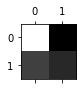



...........................Random Forest Classifier............................
Accuracy  :  87.07 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra', 'IHD']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[509  57]
 [ 61 224]] 


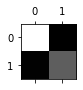



.................Support Vector Classifier - Kernel RBF......................
Accuracy  :  88.72 %
Precision :  0.88 
Recall    :  0.87 
F1_Score  :  0.87 
Feature Classes: ['IPSI', 'Contra', 'IHD']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[530  36]
 [ 58 227]] 


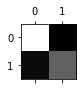



...............Support Vector Classifier - Kernel Linear.....................
Accuracy  :  86.14 %
Precision :  0.84 
Recall    :  0.83 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra', 'IHD']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[508  58]
 [ 66 219]] 


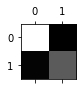



.....................Gausian Naive Biased....................................
Accuracy  :  86.37 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra', 'IHD']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[511  55]
 [ 62 223]] 


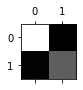

In [51]:
# Check those with IHD
ress = pd.concat([res, IHD_df, labels], axis=1)
ress = ress.dropna()
labelss = ress["label"]
ress = ress.drop(["label"], axis=1)
acc_list2, pr_list2, re_list2, f1_s_list2 = run_classifiers(ress, labelss)

## Checking the Validations with Numerical Features and Hypertension Features

................................SGD Classifier.................................
Accuracy  :  66.41 %
Precision :  0.71 
Recall    :  0.73 
F1_Score  :  0.70 
Feature Classes: ['IPSI', 'Contra', 'Hypertension']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[377 189]
 [ 57 228]] 


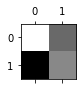



...........................Random Forest Classifier............................
Accuracy  :  84.96 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.85 
Feature Classes: ['IPSI', 'Contra', 'Hypertension']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[514  52]
 [ 63 222]] 


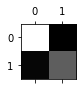



.................Support Vector Classifier - Kernel RBF......................
Accuracy  :  89.31 %
Precision :  0.88 
Recall    :  0.86 
F1_Score  :  0.87 
Feature Classes: ['IPSI', 'Contra', 'Hypertension']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[533  33]
 [ 64 221]] 


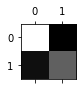



...............Support Vector Classifier - Kernel Linear.....................
Accuracy  :  85.90 %
Precision :  0.84 
Recall    :  0.83 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra', 'Hypertension']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[512  54]
 [ 68 217]] 


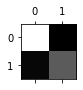



.....................Gausian Naive Biased....................................
Accuracy  :  86.02 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.85 
Feature Classes: ['IPSI', 'Contra', 'Hypertension']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[509  57]
 [ 60 225]] 


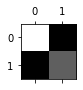

In [52]:
# Check those with Hypertension
ress = pd.concat([res, Hypertension_df, labels], axis=1)
ress = ress.dropna()
labelss = ress["label"]
ress = ress.drop(["label"], axis=1)
acc_list_Hypertension, pr_list_Hypertension, re_list_Hypertension, f1_s_list_Hypertension = run_classifiers(ress, labelss)

## Checking the Validations with Numerical Features and  Arrhythmia Features

................................SGD Classifier.................................
Accuracy  :  72.04 %
Precision :  0.76 
Recall    :  0.70 
F1_Score  :  0.72 
Feature Classes: ['IPSI', 'Contra', 'Arrhythmia']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[514  52]
 [142 143]] 


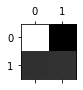



...........................Random Forest Classifier............................
Accuracy  :  87.19 %
Precision :  0.86 
Recall    :  0.85 
F1_Score  :  0.85 
Feature Classes: ['IPSI', 'Contra', 'Arrhythmia']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[512  54]
 [ 56 229]] 


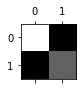



.................Support Vector Classifier - Kernel RBF......................
Accuracy  :  89.31 %
Precision :  0.89 
Recall    :  0.87 
F1_Score  :  0.88 
Feature Classes: ['IPSI', 'Contra', 'Arrhythmia']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[537  29]
 [ 62 223]] 


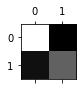



...............Support Vector Classifier - Kernel Linear.....................
Accuracy  :  86.02 %
Precision :  0.84 
Recall    :  0.83 
F1_Score  :  0.83 
Feature Classes: ['IPSI', 'Contra', 'Arrhythmia']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[512  54]
 [ 71 214]] 


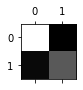



.....................Gausian Naive Biased....................................
Accuracy  :  86.14 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.84 
Feature Classes: ['IPSI', 'Contra', 'Arrhythmia']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[509  57]
 [ 61 224]] 


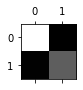

In [53]:
# Check those with Arrhythmia
ress = pd.concat([res, Arrhythmia_df, labels], axis=1)
ress = ress.dropna()
labelss = ress["label"]
ress = ress.drop(["label"], axis=1)
acc_list_Arrhythmia, pr_list_Arrhythmia, re_list_Arrhythmia, f1_s_list_Arrhythmia = run_classifiers(ress, labelss)

## Checking the Validations with Numerical Features and  History Features

................................SGD Classifier.................................
Accuracy  :  74.38 %
Precision :  0.77 
Recall    :  0.60 
F1_Score  :  0.59 
Feature Classes: ['IPSI', 'Contra', 'History']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[551  15]
 [219  66]] 


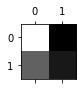



...........................Random Forest Classifier............................
Accuracy  :  89.54 %
Precision :  0.87 
Recall    :  0.85 
F1_Score  :  0.86 
Feature Classes: ['IPSI', 'Contra', 'History']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[529  37]
 [ 65 220]] 


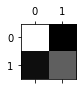



.................Support Vector Classifier - Kernel RBF......................
Accuracy  :  89.43 %
Precision :  0.88 
Recall    :  0.87 
F1_Score  :  0.88 
Feature Classes: ['IPSI', 'Contra', 'History']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[530  36]
 [ 56 229]] 


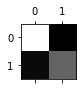



...............Support Vector Classifier - Kernel Linear.....................
Accuracy  :  86.61 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.85 
Feature Classes: ['IPSI', 'Contra', 'History']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[513  53]
 [ 63 222]] 


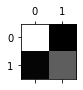



.....................Gausian Naive Biased....................................
Accuracy  :  86.37 %
Precision :  0.85 
Recall    :  0.84 
F1_Score  :  0.85 
Feature Classes: ['IPSI', 'Contra', 'History']
Label Classes  : ['NoRisk' 'Risk']
Confusion Matrix  :  
[[518  48]
 [ 66 219]] 


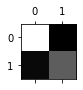

In [54]:
# Check those with History
ress = pd.concat([res, History_df, labels], axis=1)
ress = ress.dropna()
labelss = ress["label"]
ress = ress.drop(["label"], axis=1)
acc_list2, pr_list2, re_list2, f1_s_list2 = run_classifiers(ress, labelss)

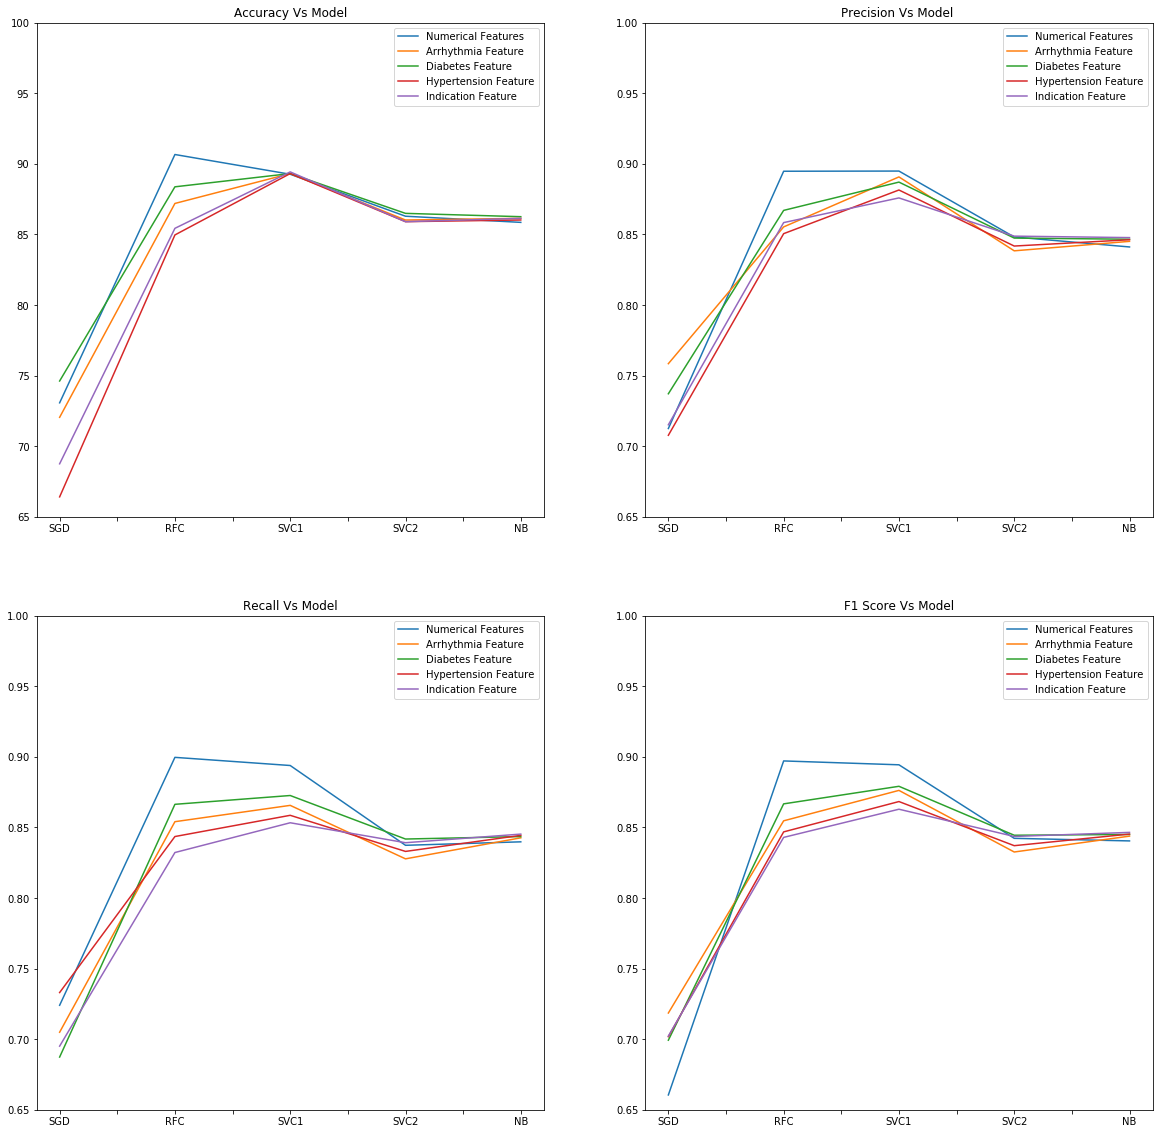

In [55]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))
ax[0, 0].plot(acc_list, label='Numerical Features')
ax[0, 0].plot(acc_list_Arrhythmia, label='Arrhythmia Feature')
ax[0, 0].plot(acc_list_diabetes, label='Diabetes Feature')
ax[0, 0].plot(acc_list_Hypertension, label='Hypertension Feature')
ax[0, 0].plot(acc_list_Indication, label='Indication Feature')
ax[0, 0].set_xticklabels( ('', 'SGD', " ",'RFC',"", 'SVC1', "", 'SVC2', "", 'NB') )
ax[0, 0].set_ylim(65,100)
ax[0, 0].legend()
ax[0, 0].set_title("Accuracy Vs Model")


ax[0, 1].plot(pr_list, label='Numerical Features')
ax[0, 1].plot(pr_list_Arrhythmia, label='Arrhythmia Feature')
ax[0, 1].plot(pr_list_diabetes, label='Diabetes Feature')
ax[0, 1].plot(pr_list_Hypertension, label='Hypertension Feature')
ax[0, 1].plot(pr_list_Indication, label='Indication Feature')
ax[0, 1].set_xticklabels( ('', 'SGD', " ",'RFC',"", 'SVC1', "", 'SVC2', "", 'NB') )
ax[0, 1].set_ylim(0.65,1)
ax[0, 1].legend()
ax[0, 1].set_title("Precision Vs Model ")
# ax[0,1].set_ylim(60,100)


ax[1, 0].plot(re_list, label='Numerical Features')
ax[1, 0].plot(re_list_Arrhythmia, label='Arrhythmia Feature')
ax[1, 0].plot(re_list_diabetes, label='Diabetes Feature')
ax[1, 0].plot(re_list_Hypertension, label='Hypertension Feature')
ax[1, 0].plot(re_list_Indication, label='Indication Feature')
ax[1, 0].set_xticklabels( ('', 'SGD', " ",'RFC',"", 'SVC1', "", 'SVC2', "", 'NB') )
ax[1, 0].set_ylim(0.65,1)
ax[1, 0].legend()
ax[1, 0].set_title("Recall Vs Model")

ax[1, 1].plot(f1_s_list, label='Numerical Features')
ax[1, 1].plot(f1_s_list_Arrhythmia, label='Arrhythmia Feature')
ax[1, 1].plot(f1_s_list_diabetes, label='Diabetes Feature')
ax[1, 1].plot(f1_s_list_Hypertension, label='Hypertension Feature')
ax[1, 1].plot(f1_s_list_Indication, label='Indication Feature')
ax[1, 1].set_xticklabels( ('', 'SGD', " ",'RFC',"", 'SVC1', "", 'SVC2', "", 'NB') )
ax[1, 1].set_ylim(0.65,1)
ax[1, 1].legend()
ax[1, 1].set_title("F1 Score Vs Model")

plt.show()

## We can clearly see the numerical features with model scv1  have the most accurate one 

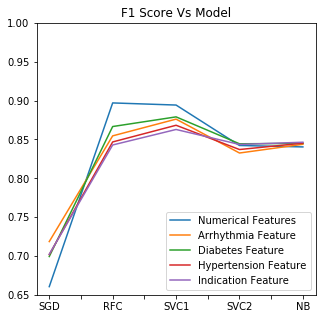

In [56]:
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(f1_s_list, label='Numerical Features')
ax.plot(f1_s_list_Arrhythmia, label='Arrhythmia Feature')
ax.plot(f1_s_list_diabetes, label='Diabetes Feature')
ax.plot(f1_s_list_Hypertension, label='Hypertension Feature')
ax.plot(f1_s_list_Indication, label='Indication Feature')
ax.set_xticklabels( ('', 'SGD', " ",'RFC',"", 'SVC1', "", 'SVC2', "", 'NB') )
ax.set_ylim(0.65,1)
ax.legend()
ax.set_title("F1 Score Vs Model")
plt.show()

### Testing 

results of best combination between numerical and categorical attributes  with the best perfmoring model 

In [57]:
svc_clf = SVC(gamma='auto', kernel='rbf')
svc_clf.fit(med_num, labels)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
predicted = svc_clf.predict(med_num_test)

# get the accuracy
print("Accuracy = {:.2f}%".format(accuracy_score(labels_test, predicted)*100))

print("Precision = {:.2f}".format(precision_score(labels_test, predicted, average="binary", pos_label='Risk')))
print("Recall = {:.2f}".format(recall_score(labels_test, predicted, average="binary", pos_label='Risk')))
print("F1_Score = {:.2f}".format(f1_score(labels_test, predicted, average="binary", pos_label='Risk')))

Accuracy = 91.26%
Precision = 0.89
Recall = 0.87
F1_Score = 0.88
